In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde

In [20]:
os.getcwd()

'C:\\Users\\nikik\\citibike_tripdata\\citibike-dashboard\\2022-citibike-tripdata'

In [21]:
os.chdir(r"C:\Users\nikik\citibike_tripdata\citibike-dashboard\2022-citibike-tripdata")

In [22]:
os.listdir()

['.ipynb_checkpoints',
 '202201-citibike-tripdata',
 '202201-citibike-tripdata.zip',
 '202202-citibike-tripdata',
 '202202-citibike-tripdata.zip',
 '202203-citibike-tripdata',
 '202203-citibike-tripdata.zip',
 '202204-citibike-tripdata',
 '202204-citibike-tripdata.zip',
 '202205-citibike-tripdata',
 '202205-citibike-tripdata.zip',
 '202206-citibike-tripdata',
 '202206-citibike-tripdata.zip',
 '202207-citibike-tripdata',
 '202207-citibike-tripdata.zip',
 '202208-citibike-tripdata',
 '202208-citibike-tripdata.zip',
 '202209-citibike-tripdata',
 '202209-citibike-tripdata.zip',
 '202210-citibike-tripdata',
 '202210-citibike-tripdata.zip',
 '202211-citibike-tripdata',
 '202211-citibike-tripdata.zip',
 '202212-citibike-tripdata',
 '202212-citibike-tripdata.zip',
 'citibike_2022_with_weather.csv',
 'Ex_2.2_project_planning.ipynb',
 'laguardia_weather_2022_tavg.csv']

In [26]:
file_path = r"C:\Users\nikik\citibike_tripdata\citibike-dashboard\2022-citibike-tripdata\citibike_2022_with_weather.csv"

chunks = pd.read_csv(
    file_path,
    usecols=['ride_id', 'date', 'tavg_c'],
    parse_dates=['date'],
    chunksize=200_000
)

df = pd.concat(chunks, ignore_index=True)

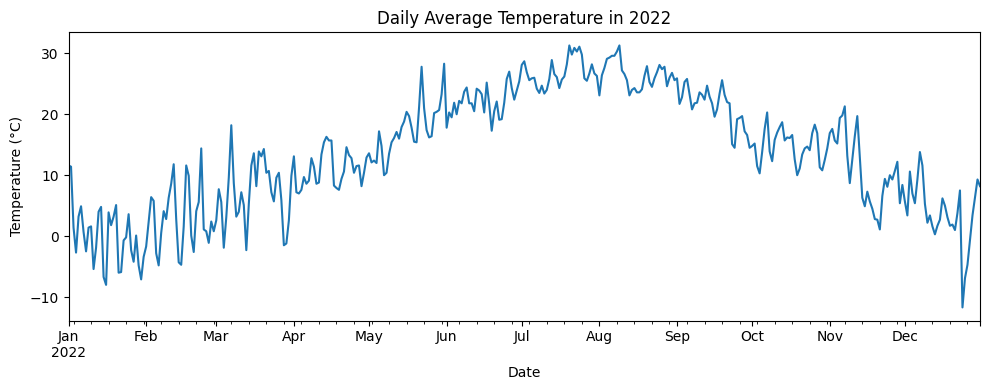

In [27]:
weather_daily = (
    df[['date', 'tavg_c']]
    .dropna()
    .groupby('date')
    .mean()
)

weather_daily = weather_daily.loc['2022-01-01':'2022-12-31']

weather_daily.plot(
    figsize=(10, 4),
    title='Daily Average Temperature in 2022',
    ylabel='Temperature (°C)',
    xlabel='Date',
    legend=False
)

plt.tight_layout()
plt.show()

In [28]:
df_daily = (
    df
    .drop_duplicates(subset=['ride_id'])   # 🔑 prevents inflated counts
    .groupby('date', as_index=False)
    .agg(
        trips_per_day=('ride_id', 'count'),
        tavg_c=('tavg_c', 'mean')
    )
)

In [29]:
df_daily = df_daily[
    (df_daily['date'] >= '2022-01-01') &
    (df_daily['date'] <= '2022-12-31')
].sort_values('date')

In [30]:
df_daily['trips_per_day'].describe()

count       365.000000
mean      81748.400000
std       33195.818419
min        2848.000000
25%       54110.000000
50%       87089.000000
75%      111846.000000
max      135072.000000
Name: trips_per_day, dtype: float64

In [31]:
weather_df = weather_daily.reset_index()

df_merged = pd.merge(
    df_daily[['date', 'trips_per_day']],
    weather_df,
    on='date',
    how='left'
)

In [32]:
df_merged.head()

,date,trips_per_day,tavg_c
0,2022-01-01,20428,11.6
1,2022-01-02,43009,11.4
2,2022-01-03,33189,1.4
3,2022-01-04,36842,-2.7
4,2022-01-05,34230,3.2


In [13]:
weather_df = df_daily[['date', 'tavg_c']].drop_duplicates().copy()
weather_df.head()

,date,tavg_c
0,2021-01-30,NaN
1,2021-02-15,NaN
2,2021-03-11,NaN
3,2021-03-14,NaN
4,2021-03-31,NaN


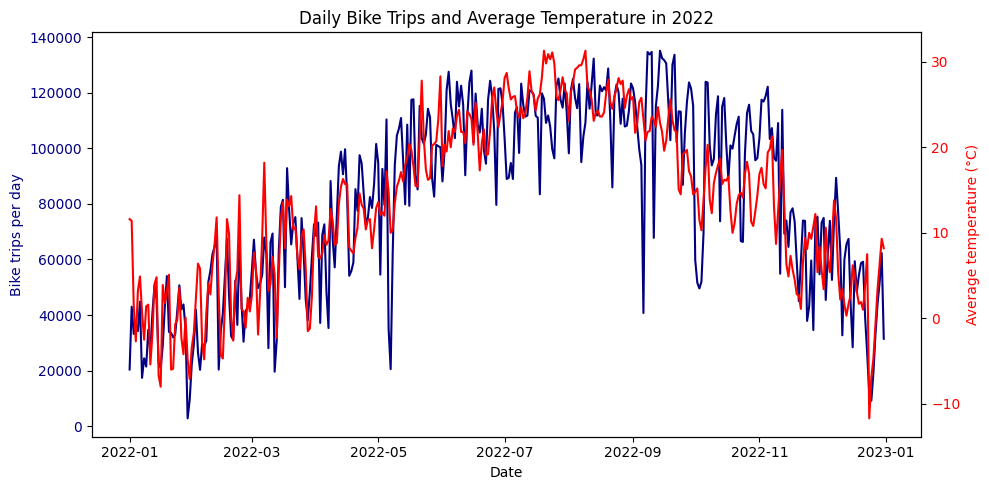

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_merged['date'], df_merged['trips_per_day'], color='navy')
ax.set_xlabel('Date')
ax.set_ylabel('Bike trips per day', color='navy')
ax.tick_params(axis='y', labelcolor='navy')

ax2 = ax.twinx()
ax2.plot(df_merged['date'], df_merged['tavg_c'], color='red')
ax2.set_ylabel('Average temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Daily Bike Trips and Average Temperature in 2022')
plt.tight_layout()
plt.show()

# Explanation of the Visualization Approach

In this exercise, Matplotlib was used to visualize daily bike trip counts and average temperatures for the year 2022. The data was first aggregated to a daily level by counting the number of trips per day and calculating the mean daily temperature. This ensured both variables shared the same temporal resolution before plotting.

The dual-axis line chart was created using Matplotlib’s object-oriented (OO) paradigm. A figure and primary axis were first created using plt.subplots(), and the bike trip counts were plotted on the primary y-axis. A secondary y-axis was then added using the twinx() method to plot the temperature data on a different scale. This approach allows two variables with different units and magnitudes to be visualized clearly on the same time axis.

The object-oriented approach was chosen because it offers greater control over plot elements such as axes, labels, and layout, making it more suitable for presentation-quality visualizations compared to the procedural (state-based) approach.